# Lab: Regression Analysis

### Before you start:

* Read the README.md file
* Comment as much as you can and use the resources (README.md file) 

Happy learning!

## Challenge 1
I work at a coding bootcamp, and I have developed a theory that the younger my students are, the more often they are late to class. In order to test my hypothesis, I have collected some data in the following table:

| StudentID | Age | Tardies |
|--------|-----|------------|
| 1      | 17  | 10         |
| 2      | 51  | 1          |
| 3      | 27  | 5          |
| 4      | 21  | 9          |
| 5      | 36  |  4         |
| 6      | 48  |  2         |
| 7      | 19  |  9         |
| 8      | 26  | 6          |
| 9      | 54  |  0         |
| 10     | 30  |  3         |

Use this command to create a dataframe with the data provided in the table. 
~~~~
student_data = pd.DataFrame({'X': [x_values], 'Y': [y_values]})
~~~~

In [1]:
# Your code here.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
from sklearn import linear_model
import seaborn as sns

In [2]:
age = [17,51,27,21,36,48,19,26,54,30]
tardies = [10,1,5,9,4,2,9,6,0,3]

student_data = pd.DataFrame({'Age': age, 'Tardies': tardies})
student_data

,Age,Tardies
0,17,10
1,51,1
2,27,5
3,21,9
4,36,4
5,48,2
6,19,9
7,26,6
8,54,0
9,30,3


Draw a dispersion diagram (scatter plot) for the data.

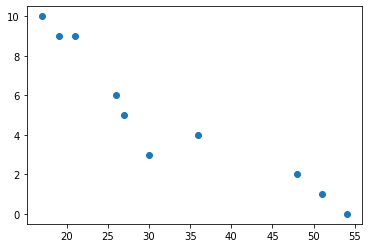

In [3]:
# Your code here.
x = student_data[['Age']]
y = student_data[['Tardies']]

plt.scatter(x,y)

Do you see a trend? Can you make any hypotheses about the relationship between age and number of tardies?

In [4]:
# Your response here. 
'''Yes, i see a negative relationship, the lower the age the higher the number od tardies'''

'Yes, i see a negative relationship, the lower the age the higher the number od tardies'

Calculate the covariance and correlation of the variables in your plot. What is the difference between these two measures? Compare their values. What do they tell you in this case? Add your responses as comments after your code.

In [5]:
# Your response here.
#correlation:
display(student_data.corr())

#covariance:
display(student_data.cov())

'''we can see that they are highly correlated with a negative variance'''

,Age,Tardies
Age,1.000000,-0.939163
Tardies,-0.939163,1.000000


,Age,Tardies
Age,187.655556,-45.566667
Tardies,-45.566667,12.544444


'we can see that they are highly correlated with a negative variance'

##### Meaning
- Covariance is an indicator of how two random variables are dependent on each other. A higher number denotes higher dependency.
- Correlation indicates how strongly these two variables are related, provided other conditions are constant. The maximum value is +1, representing a perfect dependent relationship.

##### Relationship
- We can deduct correlation from a covariance.
- Correlation provides a measure of covariance on a standard scale. It is deduced by dividing the calculated covariance by standard deviation.

##### Values
- The value of covariance lies in the range of -∞ and +∞.
- Correlation is limited to values between the range -1 and +1.

##### Scalability
- Covariance is affected.
- Correlation is not affected by a change in scales or multiplication by a constant.

##### Units
- Covariance has a definite unit as deduced by the multiplication of two numbers and their units.
- Correlation is a unitless absolute number between -1 and +1, including decimal values.

Build a regression model for this data. What will be your outcome variable? What type of regression are you using? Add your responses as comments after your code.

In [6]:
# Your response here.
model = linear_model.LinearRegression()

feature = student_data[['Age']]
target = student_data[['Tardies']]

result = model.fit(feature,target)

print('Our b0 is: ',result.intercept_[0])
print('Our b1 or slope is: ',result.coef_[0][0])

Our b0 is:  12.888803363135768
Our b1 or slope is:  -0.2428207709159808


Plot your regression model on your scatter plot.

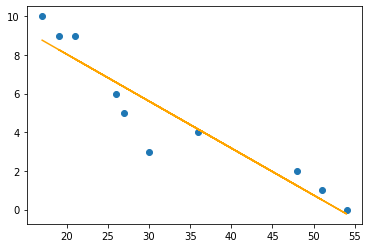

In [7]:
# Your code here.
regression_line = result.intercept_ + result.coef_[0]*x

plt.plot(feature, regression_line, c='orange')
plt.scatter(feature,target)
plt.show()

Interpret the results of your model. What can conclusions can you draw from your model and how confident in these conclusions are you? Can we say that age is a good predictor of tardiness? Add your responses as comments after your code.

In [8]:
# Your response here. 
print(result.score(feature,target))
'''Our model has a relatively high score 0.88 which means our model reflects the data without too much error. 
Yes the Age is a good predictor for tardiness'''

0.8820265558250109


'Our model has a relatively high score 0.88 which means our model reflects the data without too much error. \nYes the Age is a good predictor for tardiness'

## Challenge 2
For the second part of this lab, we will use the vehicles.csv data set. You can find a copy of the dataset in the git hub folder. This dataset includes variables related to vehicle characteristics, including the model, make, and energy efficiency standards, as well as each car's CO2 emissions. As discussed in class the goal of this exercise is to predict vehicles' CO2 emissions based on several independent variables. 

In [9]:
# Import any libraries you may need & the data
vehicles = pd.read_csv('vehicles.csv')
vehicles.head()

,Make,Model,Year,Engine Displacement,Cylinders,Transmission,Drivetrain,Vehicle Class,Fuel Type,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
0,AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,19.388824,18,17,17,522.764706,1950
1,AM General,FJ8c Post Office,1984,4.2,6.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
2,AM General,Post Office DJ5 2WD,1985,2.5,4.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,20.600625,16,17,16,555.437500,2100
3,AM General,Post Office DJ8 2WD,1985,4.2,6.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
4,ASC Incorporated,GNX,1987,3.8,6.0,Automatic 4-spd,Rear-Wheel Drive,Midsize Cars,Premium,20.600625,14,21,16,555.437500,2550


Let's use the following variables for our analysis: Year, Cylinders, Fuel Barrels/Year, Combined MPG, and Fuel Cost/Year. We will use 'CO2 Emission Grams/Mile' as our outcome variable. 

Calculate the correlations between each of these variables and the outcome. Which variable do you think will be the most important in determining CO2 emissions? Which provides the least amount of helpful information for determining CO2 emissions? Add your responses as comments after your code.

/var/folders/_0/46b7d7lx5gxfy45sbjf5py3h0000gn/T/ipykernel_6126/1621254111.py:5: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(correlation, dtype=np.bool))


<AxesSubplot:>

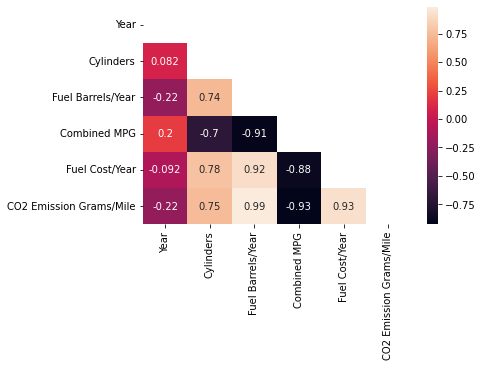

In [10]:
# Your response here. 
correlation = vehicles[['Year', 'Cylinders', 'Fuel Barrels/Year', 'Combined MPG', 'Fuel Cost/Year', 'CO2 Emission Grams/Mile']].corr()

# only show half the table
mask = np.triu(np.ones_like(correlation, dtype=np.bool))

sns.heatmap(correlation, mask=mask, annot= True)

In [11]:
'''We have 3 variables who are the most correlated with CO2 Emissions -Fuel Barrels/Year, Combined MPG, and Fuel Cost/Year
 Cylinders is also correlated but a little less and year is the one the least correlated'''

'We have 3 variables who are the most correlated with CO2 Emissions -Fuel Barrels/Year, Combined MPG, and Fuel Cost/Year\n Cylinders is also correlated but a little less and year is the one the least correlated'

Build a regression model for this data. What type of regression are you using? Add your responses as comments after your code.

In [12]:
X = vehicles[['Year', 'Cylinders', 'Fuel Barrels/Year', 'Combined MPG', 'Fuel Cost/Year']]
y = vehicles[['CO2 Emission Grams/Mile']]

model= linear_model.LinearRegression()

result = model.fit(X,y)

result.score(X,y)

0.9808734920269122

Print your regression summary, and interpret the results. What are the most important varibles in your model and why? What can conclusions can you draw from your model and how confident in these conclusions are you? Add your responses as comments after your code.

In [13]:
# Your response here. 
print(result.intercept_)
print(result.coef_)

'''Most important variables are 'Fuel Barrels/Year', 'Combined MPG' and 'Cylinders' 
as they are the ones affecting the most the prediction(high coef)
We have a strong model as our score is of 98%'''

[769.88828365]
[[-0.32061673  1.87879976 19.05292507 -3.04039938  0.03230948]]


"Most important variables are 'Fuel Barrels/Year', 'Combined MPG' and 'Cylinders' \nas they are the ones affecting the most the prediction(high coef)\nWe have a strong model as our score is of 98%"

## Challenge 2: Error Analysis

I am suspicious about the last few parties I have thrown: it seems that the more people I invite the more people are unable to attend. To know if my hunch is supported by data, I have decided to do an analysis. I have collected my data in the table below, where X is the number of people I invited, and Y is the number of people who attended. 

|  X |  Y |
|----|----|
| 1  |  1 |
| 3  |  2 |
| 4  |  4 |
| 6  |  4 |
| 8  |  5 |
| 9  |  7 |
| 11 |  8 |
| 14 |  13 |

We want to know if the relationship modeled by the two random variables is linear or not, and therefore if it is appropriate to model it with a linear regression. 
First, build a dataframe with the data. 

In [14]:
# Your code here.
X = [1,3,4,6,8,9,11,14]
Y = [1,2,4,4,5,7,8,13]

attend = pd.DataFrame({'X': X, 'Y': Y})
attend

,X,Y
0,1,1
1,3,2
2,4,4
3,6,4
4,8,5
5,9,7
6,11,8
7,14,13


In [15]:
model = linear_model.LinearRegression()

x = attend[['X']]
y = attend[['Y']]

result = model.fit(x,y)
result.score(x,y)

0.9316696375519905

Draw a dispersion diagram (scatter plot) for the data, and fit a regression line.

our b0 is:  -0.43939393939393945
our b1 or slope is:  0.8484848484848485


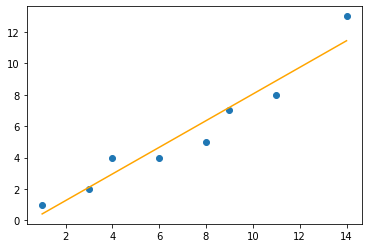

In [16]:
# Your code here.
regression_line = result.intercept_ + result.coef_[0]*x
print("our b0 is: ", result.intercept_[0])
print("our b1 or slope is: ", result.coef_[0][0])

plt.plot(x, regression_line, c='orange')
plt.scatter(x,y)
plt.show()

What do you see? What does this plot tell you about the likely relationship between the variables? Print the results from your regression.

In [17]:
# Your response here. 
#it seems that our variables have a linear relationship, we have a result of 93% so our model fits well the data.


Do you see any problematic points, or outliers, in your data? Remove these points and recalculate your regression. Print the new dispersion diagram with your new model and the results of your model. 

In [18]:
# Your response here. 
# I dont see any problematic point, but would say the the one who's the furthest from the line is the last one.

attend1 = attend[:-1]

model = linear_model.LinearRegression()

x = attend1[['X']]
y = attend1[['Y']]

result = model.fit(x,y)
result.score(x,y)


0.9433811802232854

our b0 is:  0.32330827067669077
our b1 or slope is:  0.6842105263157896


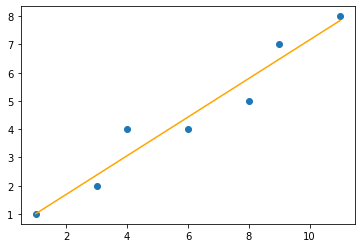

In [19]:
regression_line = result.intercept_ + result.coef_[0]*x
print("our b0 is: ", result.intercept_[0])
print("our b1 or slope is: ", result.coef_[0][0])

plt.plot(x, regression_line, c='orange')
plt.scatter(x,y)
plt.show()

What changed? Based on the results of the two models and your graphs, what can you say about the form of the data with the problematic point and without it?

In [20]:
# Your response here. 
# We have a slightly higher score +1% than first one
# The slope of our line decresed from 0.84 to 0.68, which follows the initl hunch
# also to nte that b0 in creade from -0.43 to 0.32